# <p style="background-color:lightblue;font-family:newtimeroman;font-size:180%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Sales Data </b></p>

**<b>İçindekiler:</b>**
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunları Düzenleme</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#create-graphs">Grafik Çizimi</a></li>
</ul>

<a id='import-library'></a>
# <font color='navy'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='navy'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 
İlk olarak orijinal veriyi df0 olarak tanımlaması, sonrasında analizde kullanmak için copy() fonksiyonu ile df değişkenini tanımlamalıyız.

In [6]:
df0 = pd.read_csv("sales_data.csv")
df = df0.copy()

In [7]:
df.head()

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
0,ORD00076,PRD991,"Smartwatch, Camera, Headphones",154.88971109205679,8,0.15,CUST7975,2022-03-31 00:00:00,NaN,North
1,ORD00491,PRD400,Laptop,free,19,0.20,CUST6889,2021-01-06 00:00:00,Charlie,North
2,ORD00369,PRD957,Camera,770.6350827794904,16,0.05,CUST4092,Unknown,Alice,West
3,ORD00490,PRD232,NaN,82.95197721398569,1,0.15,CUST2238,2023-08-14 00:00:00,Charlie,North
4,ORD00228,PRD123,Laptop,250.42946041877397,11,0.20,CUST8442,2020-08-15 00:00:00,Evan,North


**OrderID:** Her satış için benzersiz bir satış numarası.\
**ProductID:** Her ürün için benzersiz bir ürün numarası.\
**ProductName:** Ürün ismi.\
**UnitPrice:** Ürün birim fiyatı.\
**Quantity:** Satılan ürün miktarı.\
**Discount:** İndirim miktarı.\
**CustomerID:** Her müşteri için benzersiz bir müşteri numarası.\
**SaleDate:** Satışın yapıldığı tarih.\
**Salesperson:** Satıştan sorumlu personelin ismi.\
**Region:** Satışın yapıldığı coğrafik yer/bölge.

<a id='understanding-dataset'></a>
# <font color='navy'> <b>Veri Setini Anlama</b><font color='black'> 

In [10]:
df.duplicated().sum()

15

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      510 non-null    object 
 1   ProductID    510 non-null    object 
 2   ProductName  476 non-null    object 
 3   UnitPrice    484 non-null    object 
 4   Quantity     510 non-null    int64  
 5   Discount     510 non-null    float64
 6   CustomerID   458 non-null    object 
 7   SaleDate     503 non-null    object 
 8   Salesperson  459 non-null    object 
 9   Region       510 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 43.8+ KB


Veri setinde toplamda 510 kayıt (satır) ve 10 sütun bulunmaktadır. 2., 3., 6., 7. ve 8. sütunlarda bazı NaN değerler vardır. 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,510.0,9.158824,187.997702,-999.0,4.00,11.0,15.00,999.0
Discount,510.0,0.102843,0.070270,0.0,0.05,0.1,0.15,0.2


Veri seti içerisinde minimum değer olarak negatif bir değer bulunmaktadır. İlgili Quantity sütununda negatif değer bulunması anlamsızdır. Bu değerlerin tespit edilip düzenlenmesi gerekmektedir.

In [16]:
df.describe(include= "object").T

,count,unique,top,freq
OrderID,510,500,ORD00463,2
ProductID,510,391,PRD366,4
ProductName,476,101,Camera,92
UnitPrice,484,388,-,35
CustomerID,458,440,CUST9395,3
SaleDate,503,408,TBD,10
Salesperson,459,10,Diana,96
Region,510,5,East,111


In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 510    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd         ┃ p0     ┃ p25    ┃ p50  ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Quantity        │    0 │      0 │    9.159 │        188 │   -999 │      4 │   11 │    15 │   999 │     ▇   │  │
│ │ Discount        │    0 │      0 │   0.1028 │    0.07027 │      0 │   0.05 │  0.1 │  0.15 │   0.2 │ ▇▇ ▇▇▇  │  │
│ └─────────────────┴──────┴────────┴──────────┴────────────┴────────┴────────┴──────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ OrderID                   │       0 │          0 │                            1 │                      510 │  │
│ │ ProductID                 │       0 │          0 │                            1 │                      510 │  │
│ │ ProductName               │      34 │       6.67 │                          1.4 │                      726 │  │
│ │ UnitPrice                 │      26 │        5.1 │                         0.95 │                      484 │  │
│ │ CustomerID                │      52 │       10.2 │                          0.9 │                      458 │  │
│ │ SaleDate                  │       7 │       1.37 │                          1.9 │                      988 │  │
│ │ Salesperson               │      51 │         10 │                          0.9 │                      459 │  │
│ │ Region                    │       0 │          0 │                            1 │                      510 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [18]:
df.isnull().sum()

OrderID         0
ProductID       0
ProductName    34
UnitPrice      26
Quantity        0
Discount        0
CustomerID     52
SaleDate        7
Salesperson    51
Region          0
dtype: int64

In [19]:
df.isnull().sum().sum()

170

Veri seti içerisinde toplam **170 adet NaN değer** bulunmaktadır.

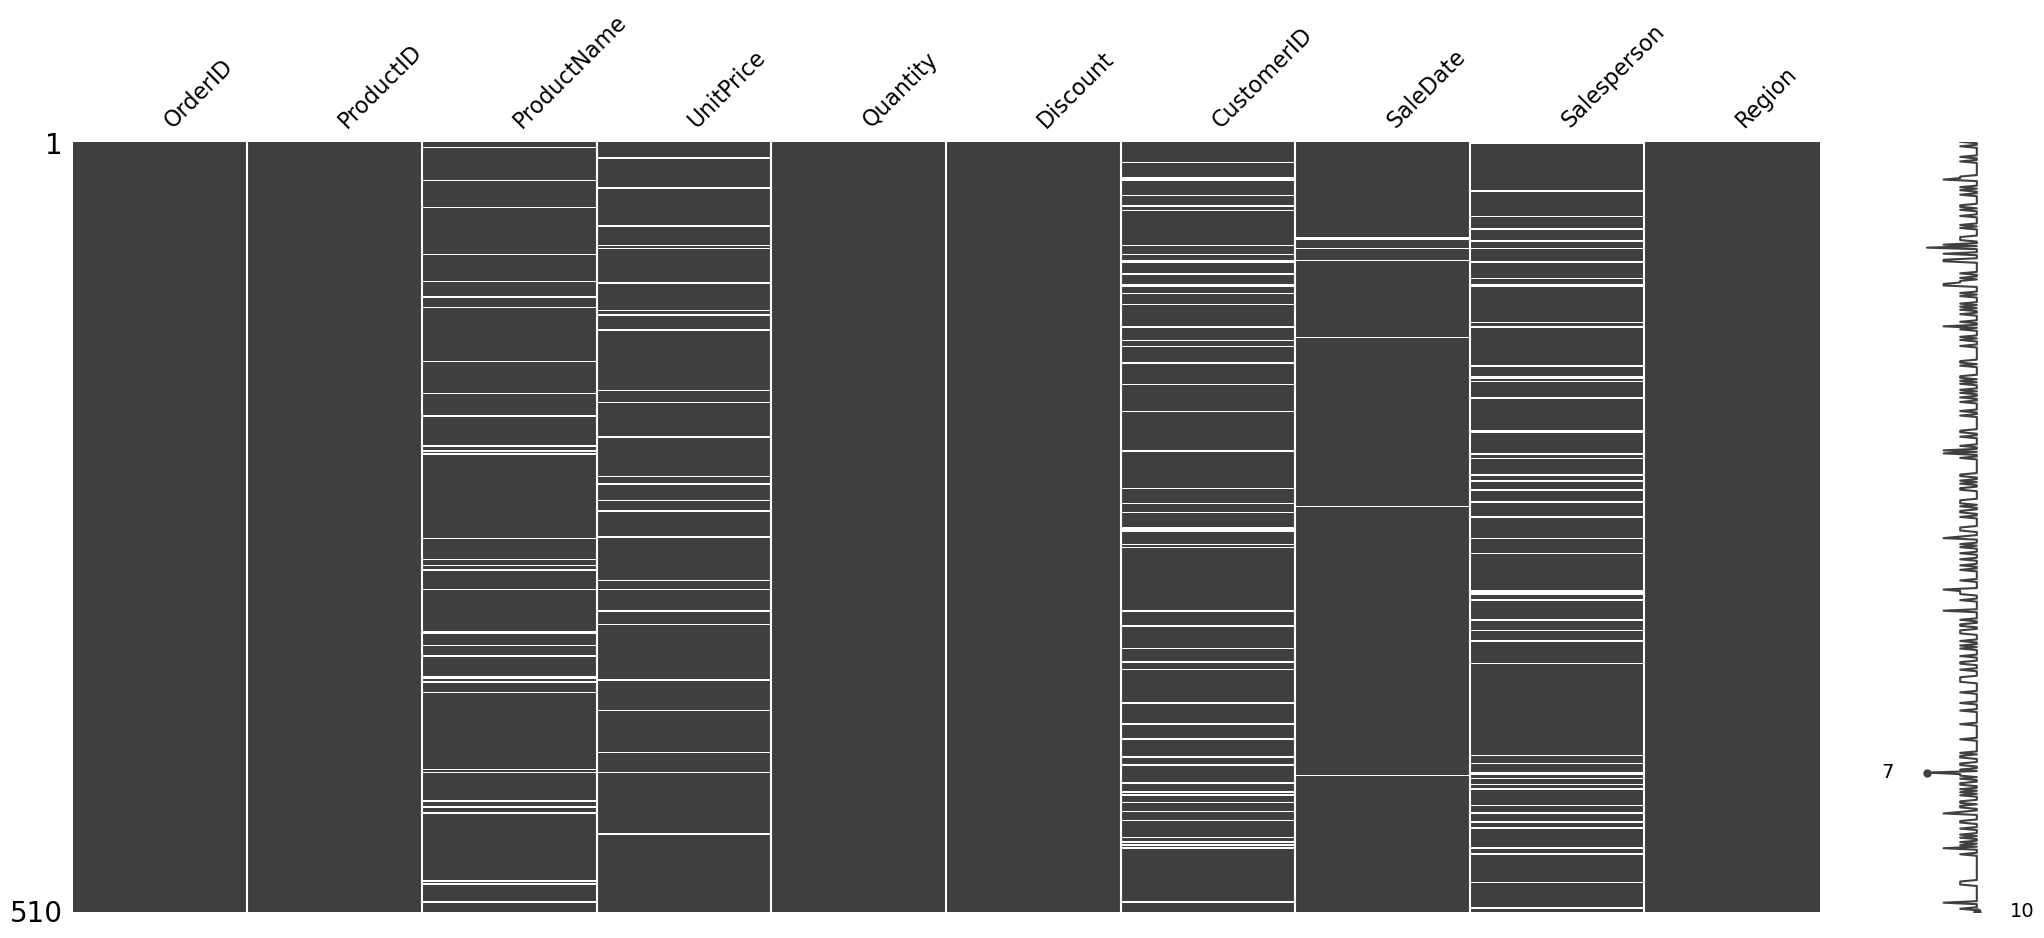

In [21]:
msno.matrix(df);

In [22]:
# Sütunlardaki benzersiz (unique) değer sayıları

df.nunique()

OrderID        500
ProductID      391
ProductName    101
UnitPrice      388
Quantity        36
Discount         5
CustomerID     440
SaleDate       408
Salesperson     10
Region           5
dtype: int64

<a id='organizing-columns'></a>
# <font color='navy'> <b>Sütunları Düzenleme</b><font color='black'> 

## <font color='royalblue'> <b>OrderID and ProductID</b><font color='black'> 

**OrderID**
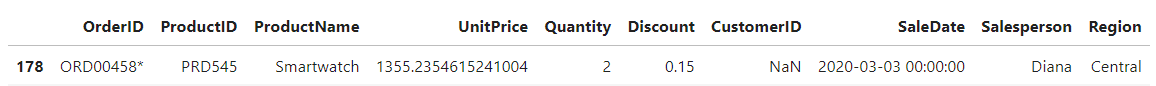
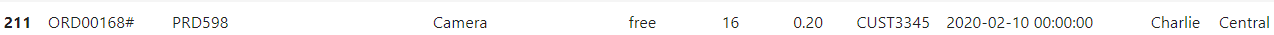
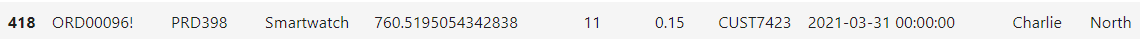

**ProductID**
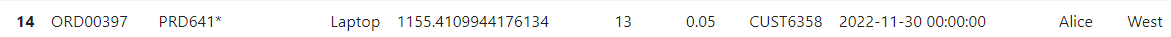
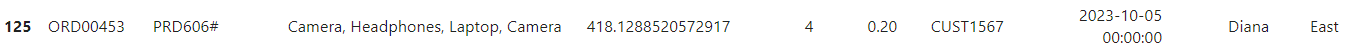

Yukarıdaki görsellerde görüldüğü üzere OrderID ve ProductID sütunlarındakibazı değerler **"*"**, **"#"** and **"!"** işaretleri ile bitmektedir. **.str.replace()** fonksiyonu kullanarak bu işaretleri veri setinden silmeliyiz.

In [26]:
df['OrderID'] = df['OrderID'].str.replace("[#!*]", "", regex= True)
df["OrderID"] = df["OrderID"].astype(str)

df['ProductID'] = df['ProductID'].str.replace("[#!*]", "", regex= True)
df["ProductID"] = df["ProductID"].astype(str)

In [27]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
304,ORD00098,PRD227,Headphones,1313.0843308161514,1,0.05,CUST1798,2021-09-04 00:00:00,Evan,Central
480,ORD00424,PRD236,"Headphones, Smartphone",1362.6377134147467,15,0.00,CUST1528,2020-12-31 00:00:00,Alice,East
106,ORD00334,PRD558,"Smartphone, Smartwatch",780.6886361285095,16,0.10,CUST5445,2021-01-04 00:00:00,Alice,South
122,ORD00419,PRD919,Smartwatch,Check,16,0.10,NaN,2020-06-06 00:00:00,NaN,South
188,ORD00274,PRD552,Headphones,711.080692506169,4,0.15,CUST6799,2021-01-03 00:00:00,Eavn,Central


## <font color='royalblue'> <b>ProductName</b><font color='black'> 

In [29]:
df["ProductName"] = df["ProductName"].str.strip()
df["ProductName"] = df["ProductName"].str.title()

In [30]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
466,ORD00044,PRD725,Laptop,55.61809741127527,4,0.00,CUST2396,2023-10-06 00:00:00,Diana,East
467,ORD00304,PRD345,Camera,63.18358367795045,13,0.20,CUST2469,2021-07-06 00:00:00,Charlie,West
523,ORD00367,PRD433,Smartphone,964.8166001885094,8,0.15,CUST4791,2020-02-14 00:00:00,Diana,Central
33,ORD00389,PRD103,Camera,free,7,0.05,CUST7923,2021-07-21 00:00:00,Diana,North
496,ORD00352,PRD269,"Smartphone, Camera, Headphones",Free,18,0.05,CUST4393,2020-03-27 00:00:00,Diana,South


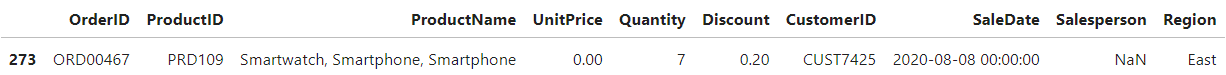

Bu EDA projesi için ProductName sütununda birden fazla bulunan satırlardaki ilk ürün ismini kullanabiliriz.

In [32]:
df["ProductName"] = df["ProductName"].str.split(", ").str[0]

Bu sütunda bazı ürün isimleri yanlış yazılmıştır. Bu değerleri doğru yazımları ile değiştirmeliyiz.

In [34]:
df["ProductName"] = df.ProductName.replace(["Laptpo", "Camra", "Headphons", "Smratphone", "Smartwach"], ["Laptop", "Camera", "Headphones", "Smartphone", "Smartwatch"])

In [35]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
340,ORD00445,PRD681,Camera,549.8126120136118,19,0.10,NaN,2021-10-03 00:00:00,Bob,East
108,ORD00113,PRD494,Headphones,1186.0657720436502,5,0.15,CUST3082,2020-02-26 00:00:00,Charlie,East
466,ORD00044,PRD725,Laptop,55.61809741127527,4,0.00,CUST2396,2023-10-06 00:00:00,Diana,East
436,ORD00318,PRD417,Smartwatch,1397.6086807512545,999,0.10,CUST7412,2022-08-14 00:00:00,Bob,East
71,ORD00403,PRD764,Camera,105.70499706938384,12,0.15,CUST7290,2022-04-22 00:00:00,Diana,East


In [36]:
df.ProductName.unique()

array(['Smartwatch', 'Laptop', 'Camera', nan, 'Headphones', 'Smartphone'],
      dtype=object)

## <font color='royalblue'> <b>UnitPrice</b><font color='black'>  

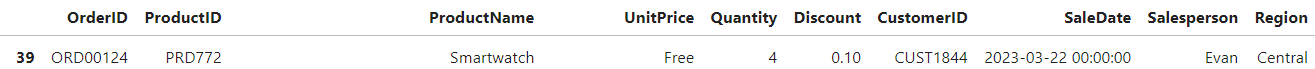
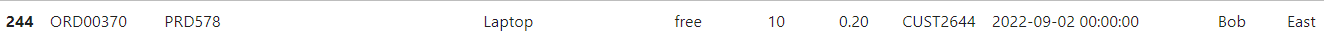
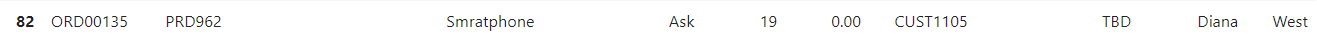
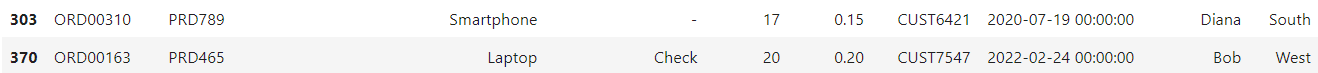

UnitPrice sütununda bazı **"Free"**, **"free"**, **"Ask"**, **"Check"** ve **"-"** değerleri bulunmaktadır. "Free" ve "free" değerleri 0.00 değerine; diğer değerler ise NaN değerlere dönüştürülebilir.

In [40]:
df["UnitPrice"] = df.UnitPrice.replace(["Free", "free"], 0)
df["UnitPrice"] = df.UnitPrice.replace(["Check", "Ask", "-"], np.nan)

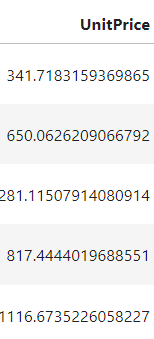

Yukarıdaki görselde görüldüğü üzere UnitPrice sütununda birçok ondalık basamak bulunmaktadır. Bu değerleri 2 ondalık basamak görünecek şekilde ayarlarsak veri seti daha iyi ve daha temiz görünecektir.

In [42]:
df["UnitPrice"] = df.UnitPrice.astype(float)
df["UnitPrice"] = df.UnitPrice.round(2)

In [43]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
161,ORD00375,PRD931,Camera,1393.42,12,0.05,CUST9825,2020-09-01 00:00:00,Bbo,East
23,ORD00116,PRD347,Headphones,410.72,7,0.00,NaN,2023-08-11 00:00:00,Bob,South
25,ORD00106,PRD660,NaN,480.13,13,0.20,NaN,2022-07-20 00:00:00,Bob,West
438,ORD00134,PRD139,Smartwatch,801.32,13,0.05,CUST6443,2023-04-28 00:00:00,NaN,East
479,ORD00094,PRD408,Headphones,107.06,1,0.05,CUST3300,2023-01-16 00:00:00,Charlie,West


## <font color='royalblue'> <b>Quantity</b><font color='black'> 

In [45]:
df.Quantity.unique()

array([   8,   19,   16,    1,   11,    6,   14,    5, -999,   17,    3,
         13,    7,   12,   15,  999,    4,   20,    9,    0,   -5,   10,
         -4,    2,   18,  -11,   -9,   -1,  -10,   -8,  -12,  -20,  -19,
        -17,   -6,  -18], dtype=int64)

Quantity sütununda bazı negatif değerler görünmektedir. **abs()** fonksiyonu ile bu değerlerin mutlak değerini alarak "-" işaretini kaldırabiliriz.

In [47]:
df["Quantity"] = df["Quantity"].abs()

In [48]:
df.Quantity.unique()

array([  8,  19,  16,   1,  11,   6,  14,   5, 999,  17,   3,  13,   7,
        12,  15,   4,  20,   9,   0,  10,   2,  18], dtype=int64)

Bu sütunda normal görünmeyen 2 değer var: **0** ve **999** değerleri.
 - Eğer Quantity sütununda 0 değeri var ise bu satış olmamış demektir.
 - Eğer 999 değeri var ise bu değer outlier (aykırı) değer olabilir.

In [50]:
df.Quantity.value_counts().sort_index()

Quantity
0       7
1      31
2      18
3      21
4      27
5      29
6      28
7      12
8      30
9      18
10     18
11     22
12     34
13     38
14     26
15     17
16     29
17     23
18     21
19     20
20     23
999    18
Name: count, dtype: int64

0 ve 999 değerlere sahip olan satırların indeks numaralarını bularak bu satırları veri setinden silebiliriz.

In [52]:
indices_to_drop = df[df["Quantity"].isin([0, 999])].index
indices_to_drop

Index([ 11,  29,  38,  48, 112, 133, 144, 154, 169, 210, 251, 257, 326, 343,
       344, 345, 359, 391, 416, 429, 436, 447, 450, 494, 507],
      dtype='int64')

In [53]:
df.drop(indices_to_drop, inplace=True)

## <font color='royalblue'> <b>Discount</b><font color='black'> 

In [55]:
df.Discount.unique()

array([0.15, 0.2 , 0.05, 0.  , 0.1 ])

In [56]:
df.Discount.value_counts()

Discount
0.05    106
0.15    103
0.20    100
0.10     90
0.00     86
Name: count, dtype: int64

Discount sütunu şu an için normal görünmektedir. SaleDate sütunu ile devam edebiliriz.

## <font color='royalblue'> <b>SaleDate</b><font color='black'> 

In [59]:
df.SaleDate.unique()

array(['2022-03-31 00:00:00', '2021-01-06 00:00:00', 'Unknown',
       '2023-08-14 00:00:00', '2020-08-15 00:00:00',
       '2021-08-21 00:00:00', '2022-12-21 00:00:00',
       '2022-01-02 00:00:00', '2023-07-31 00:00:00',
       '2022-05-22 00:00:00', '2023-11-21 00:00:00',
       '2021-07-31 00:00:00', '2022-03-26 00:00:00',
       '2022-11-30 00:00:00', '2020-06-16 00:00:00',
       '2022-04-22 00:00:00', '2020-05-08 00:00:00',
       '2023-09-27 00:00:00', '2021-04-24 00:00:00',
       '2023-06-19 00:00:00', '2023-08-08 00:00:00',
       '2023-08-11 00:00:00', '2021-06-20 00:00:00',
       '2022-07-20 00:00:00', '2022-09-17 00:00:00',
       '2020-08-07 00:00:00', '2020-05-29 00:00:00',
       '2022-03-28 00:00:00', '2021-12-20 00:00:00',
       '2021-07-21 00:00:00', '2020-03-29 00:00:00',
       '2021-02-11 00:00:00', '2023-03-29 00:00:00',
       '2023-11-02 00:00:00', '2023-03-22 00:00:00',
       '2022-02-23 00:00:00', '2022-08-12 00:00:00',
       '2022-08-04 00:00:00', '2023

SaleDate sütunundaki bazı satırlar **"Unknown"** ve **"TBD"** gibi değerlere sahip. Bu değerler **NaN** veya **NaT** değerlerine çevrilebilir.

In [61]:
# "Unknown" ve "TBD" değerlerini NaT (Not a time) değeri olarak değiştirme

df["SaleDate"] = df.SaleDate.replace(["Unknown", "TBD"], pd.NaT)

In [62]:
# SaleDate sütununun dtype'ını datatime olarak değiştirme

df["SaleDate"] = pd.to_datetime(df["SaleDate"])

In [63]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
84,ORD00046,PRD309,Smartphone,253.59,11,0.15,CUST6084,2022-05-17,Bob,North
445,ORD00021,PRD873,Headphones,975.21,3,0.20,CUST1405,2023-06-20,Evan,North
297,ORD00356,PRD818,Smartphone,573.37,13,0.10,CUST3383,2021-09-28,Diana,West
123,ORD00111,PRD710,Smartphone,386.09,11,0.05,CUST9886,2020-05-15,Daina,Central
5,ORD00216,PRD720,Headphones,604.87,6,0.05,CUST8821,2021-08-21,Alice,Central


## <font color='royalblue'> <b>SalesPerson</b><font color='black'> 

İlk olarak Salesperson sütununun ismini diğer sütunlarım yazım stili gibi değiştirelim.

In [66]:
df.rename(columns={"Salesperson": "SalesPerson"}, inplace=True)

In [67]:
df["SalesPerson"] = df["SalesPerson"].str.strip()

In [68]:
df.SalesPerson.unique()

array([nan, 'Charlie', 'Alice', 'Evan', 'Daina', 'Eavn', 'Diana', 'Bob',
       'Ailce', 'Bbo'], dtype=object)

Yukarıdaki çıktıda bazı isimler yanlış yazılmış. Bu değerleri doğru yazımları ile değiştirelim.

In [70]:
df["SalesPerson"] = df.SalesPerson.replace(["Bbo", "Eavn", "Chalrie", "Ailce", "Daina"], ["Bob", "Evan", "Charlie", "Alice", "Diana"])

In [71]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region
328,ORD00472,PRD445,NaN,533.82,17,0.05,CUST9132,2021-11-25,Bob,West
17,ORD00210,PRD500,Laptop,681.06,3,0.20,CUST5411,2021-01-06,Charlie,North
286,ORD00013,PRD588,Headphones,1413.05,15,0.15,CUST4868,2021-09-21,Evan,South
260,ORD00085,PRD656,Camera,193.16,13,0.20,CUST1670,2021-01-10,Bob,East
339,ORD00454,PRD829,Camera,425.91,6,0.15,CUST4237,2022-11-20,Diana,East


In [72]:
df.SalesPerson.value_counts()

SalesPerson
Diana      98
Alice      94
Charlie    83
Evan       81
Bob        80
Name: count, dtype: int64

## <font color='royalblue'> <b>Region</b><font color='black'> 

In [74]:
df["Region"] = df["Region"].str.strip()

In [75]:
df.Region.unique()

array(['North', 'West', 'Central', 'South', 'East'], dtype=object)

In [76]:
df.Region.value_counts()

Region
East       108
West       103
South      102
Central     87
North       85
Name: count, dtype: int64

In [77]:
# sütunları düzenledikten sonra veri seti bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      485 non-null    object        
 1   ProductID    485 non-null    object        
 2   ProductName  453 non-null    object        
 3   UnitPrice    394 non-null    float64       
 4   Quantity     485 non-null    int64         
 5   Discount     485 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     463 non-null    datetime64[ns]
 8   SalesPerson  436 non-null    object        
 9   Region       485 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 41.7+ KB


<a id='nan-values'></a>
# <font color='navy'> <b>NaN Değerler</b><font color='black'> 

In [79]:
df.sample(10)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region
292,ORD00078,PRD295,Smartphone,NaN,8,0.15,CUST5524,2020-11-24,Charlie,South
435,ORD00323,PRD766,Smartphone,0.00,6,0.20,CUST5841,2022-09-28,NaN,South
407,ORD00159,PRD776,Smartphone,562.52,13,0.20,CUST9497,2021-08-29,Charlie,West
80,ORD00117,PRD397,Smartphone,462.61,18,0.20,CUST8693,2020-05-26,Diana,East
373,ORD00247,PRD710,Camera,713.39,10,0.20,CUST7095,2020-11-26,Alice,West
509,ORD00217,PRD122,Smartwatch,NaN,5,0.00,CUST6640,2023-09-16,Alice,South
329,ORD00332,PRD328,NaN,278.23,3,0.05,CUST5972,2020-10-12,Charlie,West
85,ORD00235,PRD171,Smartphone,1239.95,11,0.15,CUST9395,2020-07-12,Alice,East
166,ORD00201,PRD175,NaN,115.20,4,0.00,CUST9498,2022-02-15,Alice,South
275,ORD00169,PRD701,Smartwatch,NaN,14,0.10,CUST3554,2022-05-28,Diana,East


In [80]:
df.isnull().sum()

OrderID         0
ProductID       0
ProductName    32
UnitPrice      91
Quantity        0
Discount        0
CustomerID     50
SaleDate       22
SalesPerson    49
Region          0
dtype: int64

**ProductName, UnitPrice, CustomerID, SaleDate, SalesPerson** sütunlarında NaN değerler bulunmaktadır.
 - CustomerID sütunundaki değerler unique değerler olduğundan dolayı bu sütunda bulunan NaN değerlerin herhangi bir metot ile doldurulması mantıklı olmaz.
 - SaleDate sütunundaki NaN değerleri bir önceki veya bir sonraki ile doldurma yöntemiyle doldurabiliriz.
 - SalesPerson sütunundaki NaN değerleri yıl ve bölge bazında en fazla satış yapan personele göre doldurabiliriz.
 - ProductName sütunundaki NaN değerleri ProductID veya UnitPrice'a göre doldurabiliriz.
 - UnitPrice sütunundaki NaN değerleri ProductName'e göre ürünlerin medyan UnitPrice'ını bularak doldurabiliriz.

## <font color='royalblue'> <b>SaleDate</b><font color='black'> 

Bu sütundaki NaN değerleri ileri doldurma (forward fill) yöntemi ile doldurabiliriz.

In [84]:
df['SaleDate'] = df['SaleDate'].fillna(method='ffill')

In [85]:
df.SaleDate.isnull().sum()

0

## <font color='royalblue'> <b>SalesPerson</b><font color='black'> 

NaN değerlerini **Yıl (Year)** ve **Bölge (Region)** bazında en çok satış yapan kişiye göre doldurabiliriz.

In [88]:
# "Year" adında yeni bir sütun oluşturma

df["Year"] = df['SaleDate'].dt.year

In [89]:
df.groupby(["Year"])["SalesPerson"].value_counts()

Year  SalesPerson
2020  Alice          27
      Evan           24
      Diana          22
      Bob            21
      Charlie        12
2021  Alice          25
      Bob            24
      Charlie        24
      Evan           23
      Diana          20
2022  Diana          29
      Charlie        24
      Alice          21
      Bob            19
      Evan           18
2023  Diana          27
      Charlie        23
      Alice          21
      Bob            16
      Evan           16
Name: count, dtype: int64

In [90]:
df.groupby(["Region"])["SalesPerson"].value_counts()

Region   SalesPerson
Central  Alice          20
         Diana          17
         Charlie        13
         Evan           13
         Bob            11
East     Alice          23
         Bob            22
         Diana          22
         Evan           17
         Charlie        16
North    Charlie        24
         Alice          16
         Bob            13
         Evan           12
         Diana          11
South    Diana          29
         Charlie        18
         Evan           17
         Alice          16
         Bob            14
West     Evan           22
         Bob            20
         Alice          19
         Diana          19
         Charlie        12
Name: count, dtype: int64

In [91]:
df.groupby(["Year", "Region"])["SalesPerson"].value_counts()

Year  Region   SalesPerson
2020  Central  Diana           7
               Alice           3
               Bob             3
               Evan            2
               Charlie         1
      East     Alice           7
               Bob             5
               Diana           5
               Evan            4
               Charlie         1
      North    Alice           7
               Evan            7
               Bob             4
               Charlie         3
               Diana           1
      South    Diana           6
               Evan            6
               Bob             5
               Alice           4
               Charlie         4
      West     Alice           6
               Evan            5
               Bob             4
               Charlie         3
               Diana           3
2021  Central  Alice           6
               Bob             3
               Charlie         3
               Diana           3
               E

In [92]:
df['SalesPerson'] = df.groupby(["Year", "Region"])["SalesPerson"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [93]:
df.SalesPerson.isnull().sum()

0

## <font color='royalblue'> <b>ProductName</b><font color='black'> 

In [95]:
# eğer NaN değerin ProductID'si başka bir ürünün id'si ile eşleşiyorsa NaN değeri o ürün adıyla doldurabiliriz.

product_id_to_name = df.dropna(subset=['ProductName']).set_index('ProductID')['ProductName'].to_dict()

def fill_product_name(row):
    if pd.isna(row['ProductName']):
        return product_id_to_name.get(row['ProductID'], np.nan)
    else:
        return row['ProductName']

df['ProductName'] = df.apply(fill_product_name, axis=1)

In [96]:
# Eğer NaN değerin ProdutID'si hiçbir ürün ile eşleşmiyorsa her ürün için UnitPrice'ın medyan değerini hesaplayarak
# NaN değerin UnitPrice'ı hangi medyan değerine yakın olursa o ürün ismi ile NaN değeri doldurabiliriz.

median_prices = df.groupby('ProductName')['UnitPrice'].median()

def fill_product_name(row):
    if pd.isna(row['ProductName']):
        distances = {name: abs(price - row['UnitPrice']) for name, price in median_prices.items()}
        closest_product = min(distances, key=distances.get)
        return closest_product
    else:
        return row['ProductName']

df['ProductName'] = df.apply(fill_product_name, axis=1)

In [97]:
df.ProductName.isnull().sum()

0

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 524
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      485 non-null    object        
 1   ProductID    485 non-null    object        
 2   ProductName  485 non-null    object        
 3   UnitPrice    394 non-null    float64       
 4   Quantity     485 non-null    int64         
 5   Discount     485 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     485 non-null    datetime64[ns]
 8   SalesPerson  485 non-null    object        
 9   Region       485 non-null    object        
 10  Year         485 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 43.6+ KB


## <font color='royalblue'> <b>ProductID</b><font color='black'> 

ProductID sütununda NaN değeri yok. Ancak her ürün için tek bir Ürün Kimliği bulunmalıdır. Aynı ürünlerin farklı Ürün Kimlikleri olmamalıdır. Bu veri setinde "Marka" veya "Sürüm" adında başka bir sütun olsaydı aynı ürünlerin farklı marka veya versiyonları için başka bir ürün kimliği tanımlanabilirdi. Ancak bu veri setinde her ürün için bir ürün ID’si tanımlamak daha mantıklı olacaktır.

In [101]:
# Başka bir çözüm yolu (her ürün için ayrı ayrı yapılmalı)

# df.loc[df["ProductName"] == "Camera", "ProductID"].mode()[0]
# df.loc[df["ProductName"] == "Camera", "ProductID"] = df.loc[df["ProductName"] == "Camera", "ProductID"].mode()[0]

In [102]:
# başka bir çözüm yolu (bu üç kod ile tüm ProductID'ler güncellenir.) 

# most_frequent_product_ids = df.groupby('ProductName')['ProductID'].agg(lambda x: x.mode()[0])
# product_mapping = most_frequent_product_ids.to_dict()
# df['ProductID'] = df['ProductName'].map(product_mapping)

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Camera"</b><font color='black'> 

In [104]:
df[(df.ProductName == "Camera")].ProductID.mode()

0    PRD681
1    PRD949
Name: ProductID, dtype: object

In [105]:
df[(df.ProductID == "PRD681")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
13,ORD00339,PRD681,Camera,463.20,3,0.15,NaN,2022-03-26,Diana,East,2022
81,ORD00346,PRD681,Camera,1485.63,12,0.15,CUST5437,2020-05-26,Diana,West,2020
135,ORD00079,PRD681,Smartwatch,118.83,6,0.15,NaN,2023-05-31,Charlie,West,2023
340,ORD00445,PRD681,Camera,549.81,19,0.10,NaN,2021-10-03,Bob,East,2021


In [106]:
df[(df.ProductID == "PRD949")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
52,ORD00011,PRD949,Camera,NaN,10,0.10,CUST3743,2022-11-02,Evan,East,2022
86,ORD00011,PRD949,Camera,NaN,10,0.10,CUST3743,2022-11-02,Evan,East,2022
98,ORD00138,PRD949,Camera,465.91,9,0.15,CUST6411,2022-03-16,Diana,North,2022


**"PRD681"** id'si için ProductName olarak **hem "Camera" hem de "Smartwatch"** içeren bir satır vardır. Ancak **"PRD949"** id'si için ProdcutName olarak **yalnızca "Camera"** vardır. **"PRD949"** id'sini **"Camera"**'ya tanımlayabiliriz.

Aynı yöntemi diğer ürünler için de yapalım!

In [108]:
df.loc[df["ProductName"] == "Camera", "ProductID"] = "PRD949"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Laptop"</b><font color='black'>

In [110]:
df[(df.ProductName == "Laptop")].ProductID.mode()

0    PRD822
Name: ProductID, dtype: object

In [111]:
df[(df.ProductID == "PRD822")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
270,ORD00143,PRD822,Laptop,898.87,20,0.00,CUST5159,2022-04-21,Bob,West,2022
351,ORD00027,PRD822,Laptop,462.41,1,0.10,CUST4417,2022-07-30,Evan,East,2022
483,ORD00179,PRD822,Laptop,1069.96,16,0.05,CUST7588,2021-11-18,Alice,South,2021


In [112]:
df.loc[df["ProductName"] == "Laptop", "ProductID"] = "PRD822"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Headphones"</b><font color='black'> 

In [114]:
df[(df.ProductName == "Headphones")].ProductID.mode()

0    PRD253
Name: ProductID, dtype: object

In [115]:
df[(df.ProductID == "PRD253")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
73,ORD00484,PRD253,Headphones,1258.59,14,0.20,CUST7064,2021-06-12,Evan,West,2021
194,ORD00133,PRD253,Headphones,398.20,16,0.05,CUST2876,2023-09-01,Charlie,East,2023
484,ORD00484,PRD253,Headphones,1258.59,14,0.20,CUST7064,2021-06-12,Evan,West,2021


In [116]:
df.loc[df["ProductName"] == "Headphones", "ProductID"] = "PRD253"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Smartwatch"</b><font color='black'> 

In [118]:
df[(df.ProductName == "Smartwatch")].ProductID.mode()

0    PRD122
1    PRD182
2    PRD653
3    PRD657
4    PRD660
5    PRD701
6    PRD795
7    PRD919
Name: ProductID, dtype: object

In [119]:
df[(df.ProductID == "PRD122")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
64,ORD00416,PRD122,Smartwatch,NaN,8,0.05,CUST2437,2020-03-09,Bob,North,2020
509,ORD00217,PRD122,Smartwatch,NaN,5,0.00,CUST6640,2023-09-16,Alice,South,2023


In [120]:
df[(df.ProductID == "PRD653")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
76,ORD00139,PRD653,Smartwatch,298.50,17,0.20,CUST2025,2022-09-17,Diana,West,2022
453,ORD00102,PRD653,Smartwatch,857.73,19,0.05,NaN,2020-08-01,Charlie,South,2020


In [121]:
df.loc[df["ProductName"] == "Smartwatch", "ProductID"] = "PRD122"

### <font color='cornflowerblue'> <b>Defining Product ID for Product "Smartphone"</b><font color='black'> 

In [123]:
df[(df.ProductName == "Smartphone")].ProductID.mode()

0    PRD193
1    PRD218
2    PRD397
3    PRD433
4    PRD455
5    PRD553
6    PRD759
7    PRD789
Name: ProductID, dtype: object

In [124]:
df[(df.ProductID == "PRD193")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
375,ORD00110,PRD193,Smartphone,428.43,19,0.0,CUST8302,2022-07-23,Charlie,South,2022
462,ORD00087,PRD193,Smartphone,NaN,1,0.1,CUST3269,2022-05-26,Alice,North,2022


In [125]:
df[(df.ProductID == "PRD218")]

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
202,ORD00214,PRD218,Smartphone,1480.85,18,0.00,CUST1021,2020-02-17,Diana,South,2020
268,ORD00167,PRD218,Smartphone,710.62,11,0.15,CUST2154,2022-02-17,Bob,North,2022


In [126]:
df.loc[df["ProductName"] == "Smartphone", "ProductID"] = "PRD193"

In [127]:
df.groupby(["ProductID"])["ProductName"].value_counts()

ProductID  ProductName
PRD122     Smartwatch      83
PRD193     Smartphone      85
PRD253     Headphones      90
PRD822     Laptop         101
PRD949     Camera         126
Name: count, dtype: int64

## <font color='royalblue'> <b>UnitPrice</b><font color='black'> 

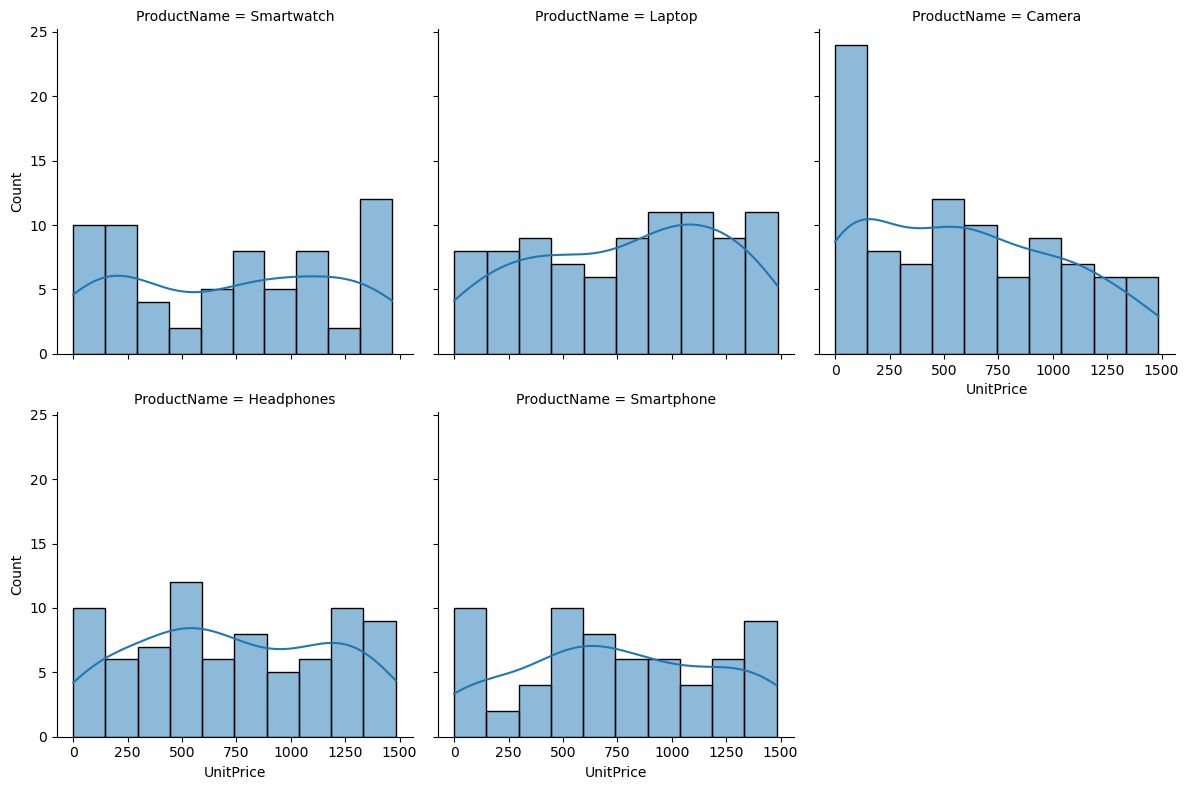

In [129]:
g = sns.FacetGrid(df, col="ProductName", col_wrap=3, height=4)
g.map(sns.histplot, "UnitPrice", bins=10, kde=True);

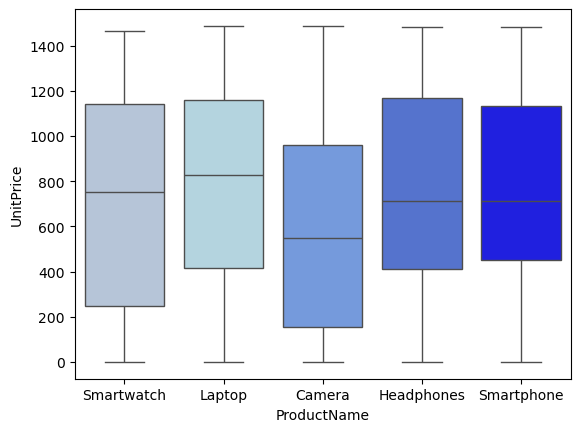

In [130]:
sns.boxplot(df, x = "ProductName" , y = "UnitPrice", 
            palette={"Smartwatch": "lightsteelblue", "Laptop": "lightblue", "Camera": "cornflowerblue", 
                     "Headphones": "royalblue", "Smartphone": "blue"}
           );

Histogram grafiklerinde görüldüğü gibi bazı ürünler **dengesiz fiyat** dağılımlarına sahiptir. Bu nedenle NaN değerlerinin **medyan** ile doldurulması veri setinin genel yapısını daha iyi koruyabilir.

In [132]:
df['UnitPrice'] = df.groupby('ProductName')['UnitPrice'].transform(lambda x: x.fillna(x.median()))

In [133]:
df.UnitPrice.isnull().sum()

0

## <font color='royalblue'> <b>CustomerID</b><font color='black'> 

In [135]:
df.CustomerID.isnull().sum()

50

Kimlik numaraları benzersiz değerlerdir. Bu nedenle CustomerID sütunundaki NaN değerleri hiçbir yöntemle doldurulamamaktadır. Bu değerleri veri setinden silebiliriz.

In [137]:
df.dropna(subset=['CustomerID'], inplace=True)

In [138]:
df.CustomerID.isnull().sum()

0

## <font color='royalblue'> <b>NaN Değerlerin Doldurulmasından Sonra...</b><font color='black'> 

In [140]:
df.isnull().sum()

OrderID        0
ProductID      0
ProductName    0
UnitPrice      0
Quantity       0
Discount       0
CustomerID     0
SaleDate       0
SalesPerson    0
Region         0
Year           0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 524
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      435 non-null    object        
 1   ProductID    435 non-null    object        
 2   ProductName  435 non-null    object        
 3   UnitPrice    435 non-null    float64       
 4   Quantity     435 non-null    int64         
 5   Discount     435 non-null    float64       
 6   CustomerID   435 non-null    object        
 7   SaleDate     435 non-null    datetime64[ns]
 8   SalesPerson  435 non-null    object        
 9   Region       435 non-null    object        
 10  Year         435 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 39.1+ KB


In [142]:
df.sample(5)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
1,ORD00491,PRD822,Laptop,0.00,19,0.20,CUST6889,2021-01-06,Charlie,North,2021
158,ORD00016,PRD822,Laptop,613.10,1,0.00,CUST6951,2022-09-19,Bob,West,2022
368,ORD00300,PRD122,Smartwatch,1378.72,6,0.20,CUST7797,2023-11-08,Diana,Central,2023
247,ORD00077,PRD949,Camera,718.35,12,0.05,CUST5296,2020-05-24,Alice,Central,2020
96,ORD00147,PRD122,Smartwatch,1464.85,9,0.15,CUST8709,2023-08-18,Diana,North,2023


Verileri organize etme konusunda yapabileceğiniz son şey SaleDate sütununu artan şekilde sıralamak olabilir. Bu verilerin daha düzenli görünmesini sağlayacaktır.

In [144]:
df = df.sort_values(by='SaleDate', ascending=True).reset_index(drop=True)

In [145]:
df.head()

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,SalesPerson,Region,Year
0,ORD00301,PRD122,Smartwatch,1354.21,15,0.15,CUST8892,2020-01-02,Diana,East,2020
1,ORD00422,PRD822,Laptop,1420.68,13,0.15,CUST8644,2020-01-03,Alice,South,2020
2,ORD00023,PRD193,Smartphone,711.99,4,0.15,CUST1233,2020-01-09,Bob,South,2020
3,ORD00158,PRD193,Smartphone,711.99,14,0.15,CUST7977,2020-01-13,Bob,Central,2020
4,ORD00383,PRD122,Smartwatch,1439.11,8,0.05,CUST2864,2020-01-18,Evan,Central,2020


In [146]:
# eğer veri setinin düzenlenmiş halini .csv uzantısı ile kaydetmek isterseniz # işaretini silerek aşağıdaki kodu çalıştırabilirsiniz.

# df.to_csv("edited_data.csv", index= False)

<a id='create-graphs'></a>
# <font color='navy'> <b>Grafik Çizimi</b><font color='black'> 

## <font color='royalblue'> <b>Personellerin Yıllık Bazda Yaptıkları Satışlar</b><font color='black'> 

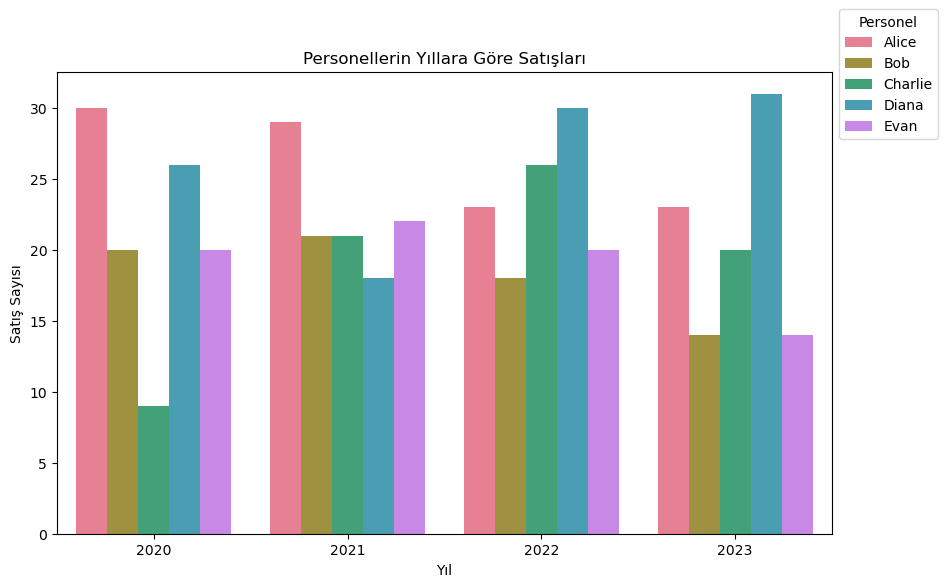

In [149]:
SalesCount = df.SalesPerson.value_counts(ascending= False)
sales_counts = df.groupby(['SalesPerson', 'Year']).size().reset_index(name='SalesCount')

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SalesCount', hue='SalesPerson', data=sales_counts, palette = 'husl')

plt.title('Personellerin Yıllara Göre Satışları')
plt.xlabel('Yıl')
plt.ylabel('Satış Sayısı')
plt.legend(title='Personel', bbox_to_anchor=(1, 1.15))
plt.show()

## <font color='royalblue'> <b>Ürünlerin Yıllara Göre Satış Miktarı</b><font color='black'> 

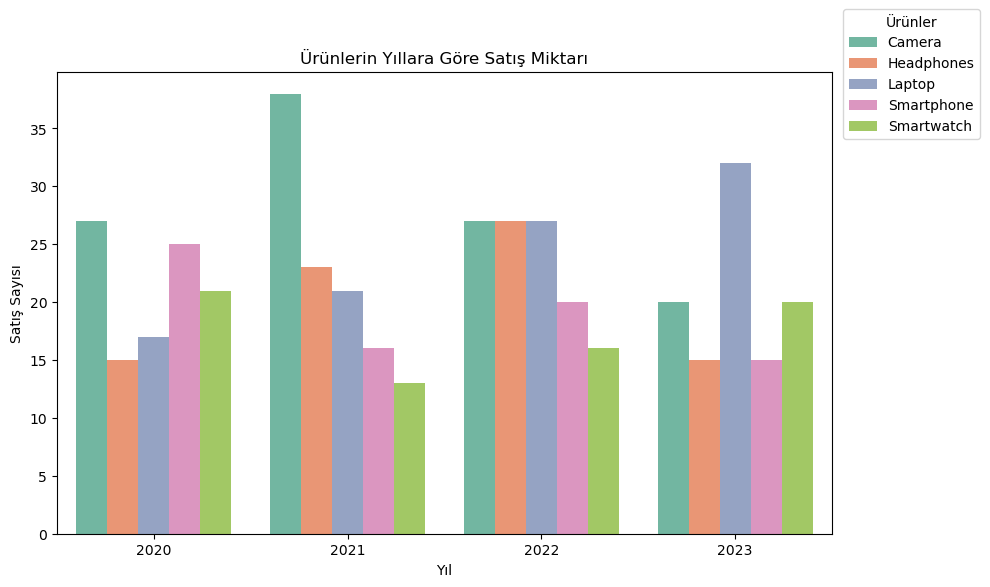

In [151]:
SalesCount2 = df.ProductName.value_counts(ascending= False)
sales_counts2 = df.groupby(['ProductName', 'Year']).size().reset_index(name='SalesCount2')

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='SalesCount2', hue='ProductName', data=sales_counts2, palette= 'Set2')

plt.title('Ürünlerin Yıllara Göre Satış Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Satış Sayısı')
plt.legend(title='Ürünler', bbox_to_anchor=(1.2, 1.15))
plt.show()

## <font color='royalblue'> <b>Yıllara Göre Elde Edilen Toplam Kazanç</b><font color='black'> 

In [153]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity'] * (1 - df['Discount'])

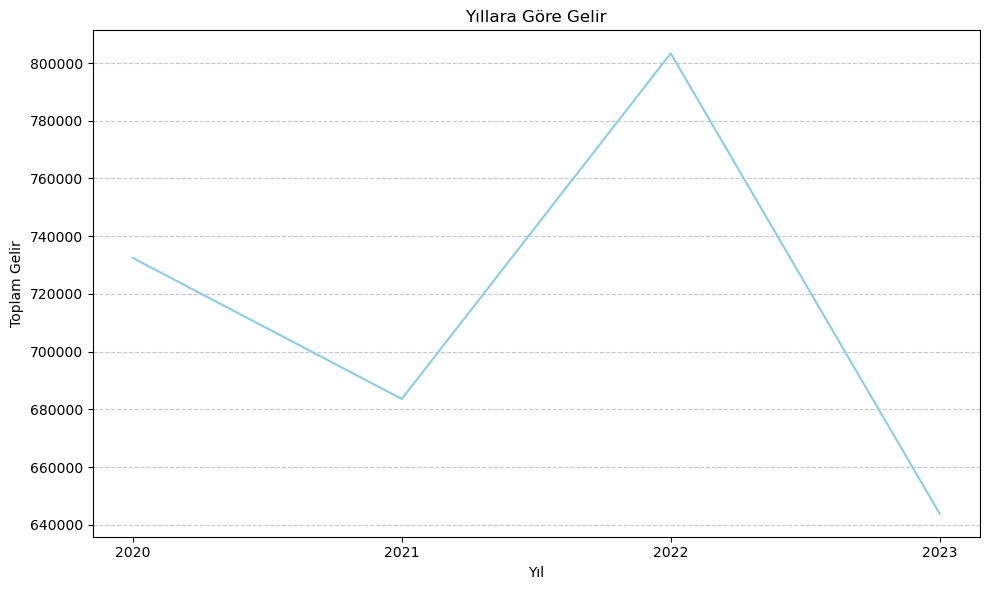

In [154]:
annual_totals = df.groupby('Year')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
annual_totals.plot(kind='line', color='skyblue')

plt.title('Yıllara Göre Gelir')
plt.xlabel('Yıl')
plt.ylabel('Toplam Gelir')
plt.xticks(np.arange(2020,2024,1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## <font color='royalblue'> <b>Miktar (Quantity) ve İndirim (Discount) Arasında Bir İlişki Var Mı?</b><font color='black'> 

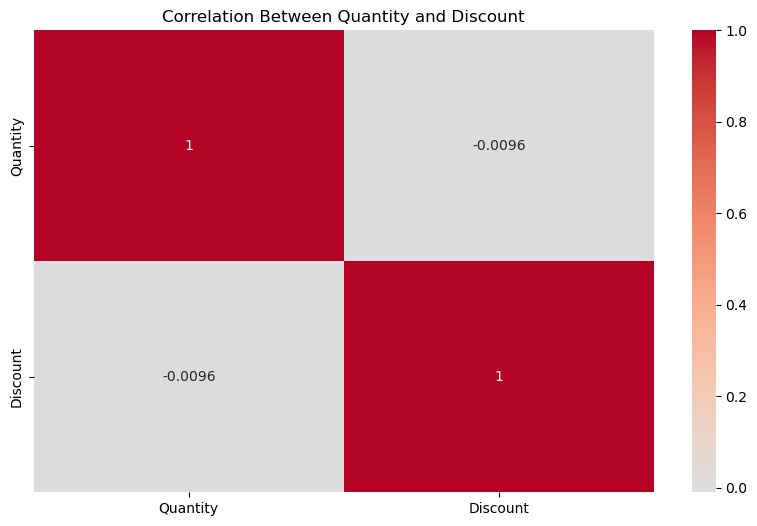

In [156]:
plt.figure(figsize=(10, 6))

sns.heatmap(df[['Quantity', 'Discount']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Quantity and Discount')

plt.show()

-0,2 korelasyon değeri, **Miktar (Quantity)** ve **İndirim (Discount)** sütunları arasında **zayıf ve negatif bir ilişki** olduğunu gösterir. Bu, satın alınan ürünün miktarı ile indirim oranı arasında genellikle güçlü bir korelasyon olmadığını göstermektedir. Bu nedenle indirimdeki küçük değişikliklerin satın alınan miktarı önemli ölçüde etkilemesi pek olası değildir.